In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
import math
import numpy as np
import pandas as pd
from scipy import stats
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv("df_final1.csv")
df.head()

,Unnamed: 0,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,...,0.302000,0.53600,0.281,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,...,0.283000,0.93400,0.360,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,...,0.000089,0.80000,0.262,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,...,0.066400,0.00127,0.117,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,...,0.000576,0.09690,0.299,0.6370,143.956,4.0,733.0,183.0,4.067086,happy


In [3]:
df.dtypes

Unnamed: 0            int64
name                 object
duration_ms           int64
explicit               bool
popularity            int64
artists              object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
n_beats             float64
n_bars              float64
processing          float64
genre                object
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['explicit_enc'] = le.fit_transform(df['explicit'])

In [5]:
no_use = ['Unnamed: 0', 'name', 'artists','explicit', 'album_name']
df_new = df.drop(no_use, axis=1)

In [6]:
X = df_new.drop(columns=['genre'])
y = df_new['genre']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, stratify = y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9935, 18), (3312, 18), (9935,), (3312,))

In [8]:
df_new.head()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre,explicit_enc
0,241760,46,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance,0
1,444000,0,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian,0
2,333506,3,0.363,0.854,2,-7.445,1.0,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal,0
3,269800,23,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass,0
4,307651,25,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,733.0,183.0,4.067086,happy,0


In [9]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# define a range of k
param_grid = {'n_neighbors': [10, 11,12,13,14,15,16,17,18,19,20, 21,22,23,24,25],'weights': ['uniform','distance'],
              'metric':['euclidean','manhattan']}

In [12]:
# create KNN classifier
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

In [ ]:
# create KNN classifier
knn_classifier = KNeighborsClassifier()

In [14]:
a = grid_search.fit(X_train_scaled, y_train)

C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  F

In [15]:
a.cv_results_.keys()
print(a.best_score_,a.best_params_)

0.42929038751887266 {'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'distance'}


In [16]:
y_train_pred_knn = a.predict(X_train_scaled)
y_test_pred_knn = a.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred_knn))
print('Train F1-score %s' % f1_score(y_train, y_train_pred_knn, average=None))
print()
print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred_knn))
print('Test F1-score %s' % f1_score(y_test, y_test_pred_knn, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Accuracy 0.4468599033816425
Test F1-score [0.27636364 0.58823529 0.51818182 0.21804511 0.22666667 0.53367876
 0.55063291 0.57881137 0.43195266 0.30452675 0.31272727 0.29538462
 0.49411765 0.49659864 0.48030019 0.4288499  0.38709677 0.20952381
 0.75742574 0.51533742]


In [18]:
print(classification_report(y_test, y_test_pred_knn))

               precision    recall  f1-score   support

     afrobeat       0.37      0.22      0.28       172
  black-metal       0.58      0.60      0.59       167
    bluegrass       0.43      0.66      0.52       174
       brazil       0.26      0.19      0.22       156
    breakbeat       0.27      0.19      0.23       175
chicago-house       0.50      0.57      0.53       181
       disney       0.58      0.52      0.55       166
        forro       0.53      0.64      0.58       174
        happy       0.43      0.43      0.43       168
          idm       0.50      0.22      0.30       169
       indian       0.43      0.25      0.31       174
   industrial       0.32      0.27      0.30       177
      iranian       0.61      0.42      0.49       151
      j-dance       0.52      0.48      0.50       153
       j-idol       0.37      0.70      0.48       184
     mandopop       0.33      0.60      0.43       183
        sleep       0.75      0.26      0.39        69
      spa

## Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# create and train the Gaussian Naive Bayes classifier
model_NB = GaussianNB()
model_NB.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
# make predictions on the test set
y_pred_nb = model_NB.predict(X_test_scaled)

In [ ]:
# evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_nb)
classification_report_str = classification_report(y_test, y_pred_nb)

In [23]:
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.2711352657004831
Classification Report:
                precision    recall  f1-score   support

     afrobeat       0.40      0.02      0.04       172
  black-metal       0.61      0.46      0.53       167
    bluegrass       0.00      0.00      0.00       174
       brazil       0.45      0.12      0.18       156
    breakbeat       0.19      0.10      0.13       175
chicago-house       0.41      0.60      0.49       181
       disney       0.12      0.93      0.21       166
        forro       0.34      0.45      0.39       174
        happy       0.36      0.23      0.28       168
          idm       0.48      0.08      0.14       169
       indian       0.25      0.01      0.01       174
   industrial       0.34      0.14      0.20       177
      iranian       0.73      0.25      0.37       151
      j-dance       0.42      0.40      0.41       153
       j-idol       0.29      0.76      0.41       184
     mandopop       0.38      0.44      0.41       183
        sle

In [24]:
model_NB.predict_proba(X_test_scaled)

array([[2.95616981e-04, 3.75110859e-13, 3.41799244e-03, ...,
        9.66910285e-03, 1.68886145e-10, 1.30567098e-05],
       [7.63808111e-04, 5.21207981e-09, 5.14204049e-03, ...,
        1.70729492e-03, 2.07959399e-07, 6.42972283e-08],
       [9.29330186e-12, 4.83813359e-21, 2.32537949e-09, ...,
        7.14480879e-30, 1.09128989e-08, 4.74452445e-15],
       ...,
       [8.15816599e-04, 4.15947846e-05, 2.02122100e-04, ...,
        3.79557617e-04, 2.78988532e-22, 3.07263237e-02],
       [6.85602126e-03, 3.12648641e-03, 2.89072865e-04, ...,
        3.03430352e-17, 4.82939922e-06, 2.08935983e-02],
       [4.14176228e-03, 2.67154228e-06, 6.19003497e-07, ...,
        4.42889540e-20, 5.96706734e-26, 7.06781895e-02]])

In [25]:
!pip install scikit-plot


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Bernoulli Naive Bayes 

In [26]:
from sklearn.naive_bayes import BernoulliNB 

In [27]:
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['non-bot', 'bot']))

In [28]:
#Bernoulli Naive Bayes
bnb = BernoulliNB()
y_pred_bnb = bnb.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [29]:
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
classification_report_bnb = classification_report(y_test, y_pred_bnb)

C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [30]:
print(f'Accuracy: {accuracy_bnb}')
print('Classification Report:\n', classification_report_bnb)

Accuracy: 0.1446256038647343
Classification Report:
                precision    recall  f1-score   support

     afrobeat       0.00      0.00      0.00       172
  black-metal       0.40      0.01      0.02       167
    bluegrass       0.09      0.51      0.16       174
       brazil       0.00      0.00      0.00       156
    breakbeat       0.00      0.00      0.00       175
chicago-house       0.09      0.36      0.14       181
       disney       0.13      0.23      0.16       166
        forro       0.19      0.20      0.19       174
        happy       0.00      0.00      0.00       168
          idm       0.11      0.03      0.05       169
       indian       0.00      0.00      0.00       174
   industrial       0.21      0.14      0.17       177
      iranian       0.36      0.60      0.45       151
      j-dance       0.41      0.29      0.34       153
       j-idol       0.00      0.00      0.00       184
     mandopop       0.14      0.40      0.21       183
        sle

### Decision Tree 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier, plot_tree

[10, 11, 12, 13, 15]


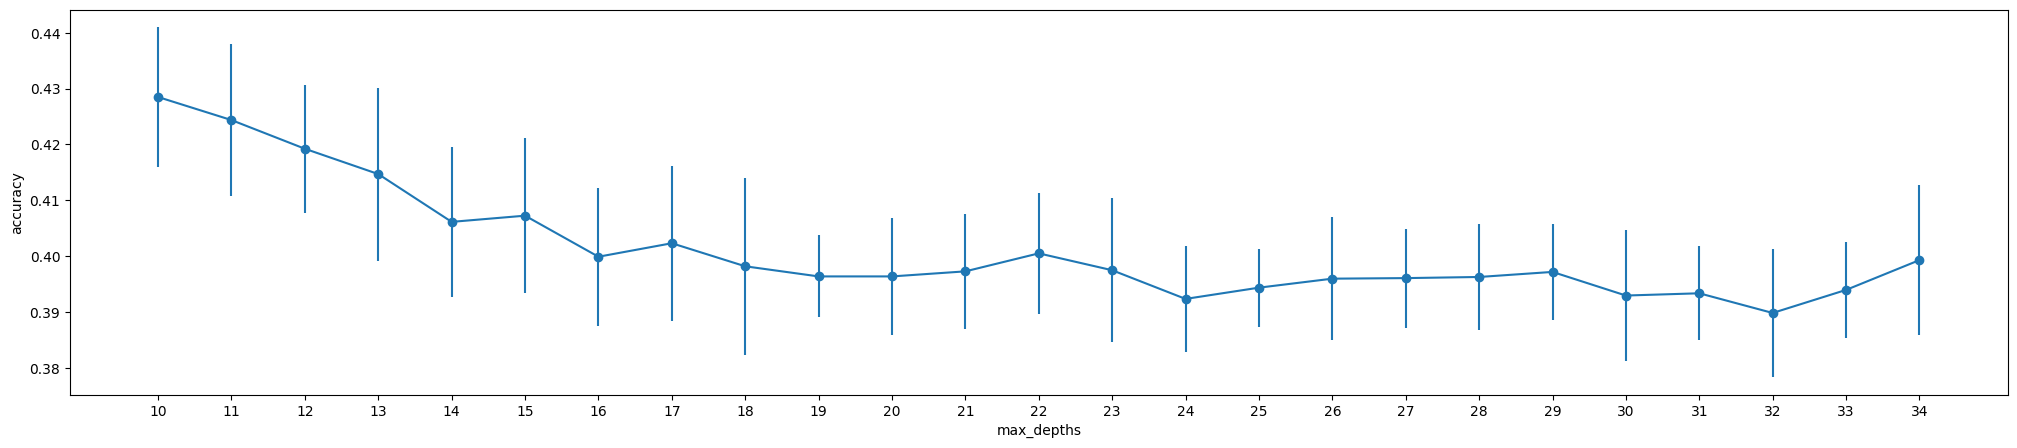

In [32]:
def depth_param_graph(interval, train_X, train_y, cv):
  max_depths = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for max_depth in max_depths:
      dt = DecisionTreeClassifier(max_depth=max_depth)
      cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
      avg_scores.append(np.mean(cross_val_scores))
      std_scores.append(np.std(cross_val_scores))
      avg_score = np.mean(cross_val_scores)
      std_score = np.std(cross_val_scores)
      scores.append((max_depth, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_depth = sorted([t[0] for t in scores[:5]])
  print(range_depth)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(max_depths)), max_depths)
  plt.xlabel("max_depths")
  plt.ylabel("accuracy")
  plt.show()

  return range_depth

range_depth = depth_param_graph(interval=range(10, 35, 1), train_X=X_train_scaled, train_y=y_train, cv=5)

[16, 18, 20, 22, 24]


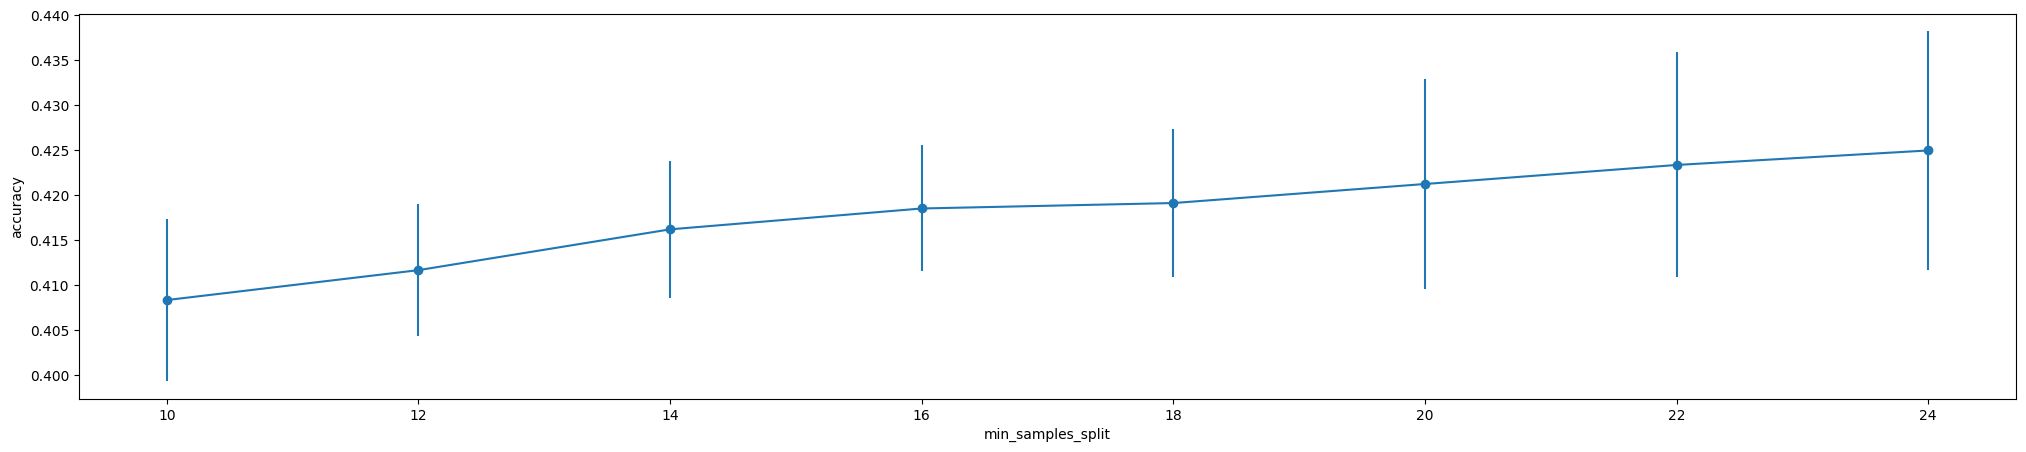

In [33]:
def split_param_graph(interval, train_X, train_y, cv):
  min_samples_splits = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for min_samples_split in min_samples_splits:
     dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
     cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
     avg_scores.append(np.mean(cross_val_scores))
     std_scores.append(np.std(cross_val_scores))
     avg_score = np.mean(cross_val_scores)
     std_score = np.std(cross_val_scores)
     scores.append((min_samples_split, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_split = sorted([t[0] for t in scores[:5]])
  print(range_split)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(min_samples_splits)), min_samples_splits)
  plt.xlabel("min_samples_split")
  plt.ylabel("accuracy")
  plt.show()

  return range_split

range_split = split_param_graph(interval=range(10, 25, 2), train_X=X_train_scaled, train_y=y_train, cv=5)

[11, 16, 19, 20, 21]


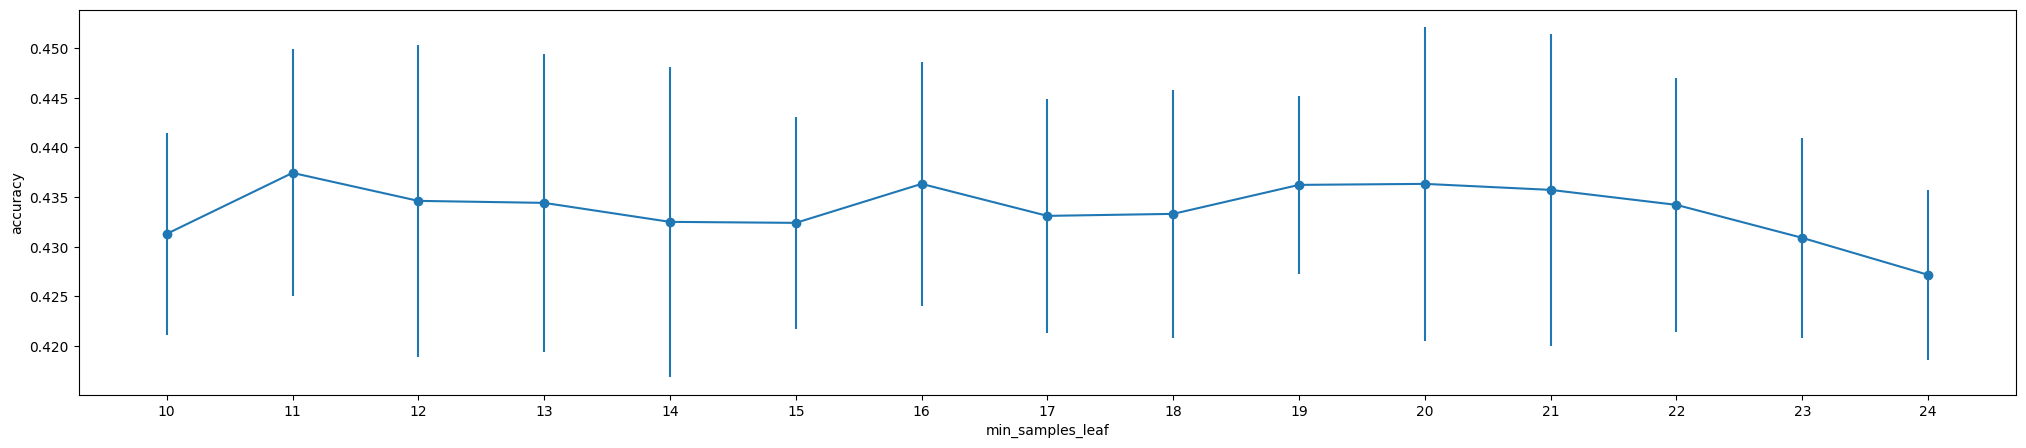

In [34]:
def leaf_param_graph(interval, train_X, train_y, cv):
  min_samples_leafs = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for min_samples_leaf in min_samples_leafs:
     dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
     cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
     avg_scores.append(np.mean(cross_val_scores))
     std_scores.append(np.std(cross_val_scores))
     avg_score = np.mean(cross_val_scores)
     std_score = np.std(cross_val_scores)
     scores.append((min_samples_leaf, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_leaf = sorted([t[0] for t in scores[:5]])
  print(range_leaf)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
  plt.xlabel("min_samples_leaf")
  plt.ylabel("accuracy")
  plt.show()

  return range_leaf

range_leaf = leaf_param_graph(interval=range(10, 25, 1), train_X=X_train_scaled, train_y=y_train, cv=5)

In [35]:
%%time
# TODO: implement tqdm

param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)

CPU times: total: 0 ns
Wall time: 0 ns


In [36]:
random_search.fit(X_train_scaled, y_train)
dt = random_search.best_estimator_

Fitting 50 folds for each of 10 candidates, totalling 500 fits


In [37]:
print(dt)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=16, min_samples_split=20)


In [38]:
random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 20,
 'min_samples_leaf': 16,
 'max_depth': 12,
 'criterion': 'gini'}

In [39]:
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [40]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred_dt))
print('Train F1-score %s' % f1_score(y_train, y_train_pred_dt, average=None))
print()
print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred_dt))
print('Test F1-score %s' % f1_score(y_test, y_test_pred_dt, average=None))

Train Accuracy 0.5656768998490186
Train F1-score [0.42289935 0.73778664 0.58241758 0.4797048  0.46062992 0.653414
 0.56767677 0.64985451 0.56652361 0.47280335 0.4893617  0.50824442
 0.68662675 0.53414634 0.60559306 0.58302583 0.56777494 0.37408568
 0.79359095 0.54794521]

Test Accuracy 0.4353864734299517
Test F1-score [0.30727763 0.61714286 0.51630435 0.2767624  0.25936599 0.47769029
 0.44637681 0.50420168 0.38888889 0.33125    0.34161491 0.36103152
 0.60377358 0.39370079 0.53529412 0.43373494 0.37313433 0.28025478
 0.74251497 0.49190939]


In [41]:
print(classification_report(y_test, y_test_pred_dt))

               precision    recall  f1-score   support

     afrobeat       0.29      0.33      0.31       172
  black-metal       0.59      0.65      0.62       167
    bluegrass       0.49      0.55      0.52       174
       brazil       0.23      0.34      0.28       156
    breakbeat       0.26      0.26      0.26       175
chicago-house       0.46      0.50      0.48       181
       disney       0.43      0.46      0.45       166
        forro       0.49      0.52      0.50       174
        happy       0.34      0.46      0.39       168
          idm       0.35      0.31      0.33       169
       indian       0.37      0.32      0.34       174
   industrial       0.37      0.36      0.36       177
      iranian       0.57      0.64      0.60       151
      j-dance       0.50      0.33      0.39       153
       j-idol       0.58      0.49      0.54       184
     mandopop       0.48      0.39      0.43       183
        sleep       0.38      0.36      0.37        69
      spa